> # Chapter 10. Sampling and Empirical Distributions
---



### 1. Empirical Distributions


### 2. Sampling from a Population


### 3. Empirical Distibution of a Statistic


In [0]:
# HIDDEN
from datascience import *
import numpy as np

#import matplotlib
#matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
#np.set_printoptions(threshold=50)

+ 많은 데이터 과학 작업은 *random samples*의 data에 기초


+ 그러므로 random samples의 의미를 명확하게 이해할 필요가 있음


+ 특히 매우 큰 규모의 sampling이 관심의 대상이 됨


+ 다음 top movies 데이터를 가지고 이해해 보자. 

In [2]:
top1 = Table.read_table('top_movies.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')

top.set_format(make_array(3, 4), NumberFormatter)


/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
1,Avatar,Fox,"760,507,625","846,120,800",2009
2,Titanic,Paramount,"658,672,302","1,178,627,900",1997
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
4,Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
5,The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
6,Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
7,Star Wars,Fox,"460,998,007","1,549,640,500",1977
8,Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
9,The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


> Sampling Rows of a Table
---
+ 각 row는 movie를 나타내는 individual이다.


+ 따라서 sampling이란 movie들을 선택하는 것이며 Table의 row들을 선택하는 것이다.


+ __Deterministic Samples__ 
 - (확률적인) 우연성이 아닌 결정론적으로 sample을 선택할 수 있다.
 - 다음 예를 살펴보자.

In [3]:
top.take(make_array(3, 18, 100))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
18,Spider-Man,Sony,"403,706,375","604,517,300",2002
100,Gone with the Wind,MGM,"198,676,459","1,757,788,200",1939


In [4]:
top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,"381,011,219","417,512,200",2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,"317,575,550","486,442,900",2001
54,Harry Potter and the Half-Blood Prince,Warner Bros.,"301,959,197","352,098,800",2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,"292,004,738","369,250,200",2007
62,Harry Potter and the Goblet of Fire,Warner Bros.,"290,013,036","393,024,800",2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,"261,988,482","390,768,100",2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,"249,541,069","349,598,600",2004


> ### Probability Samples
---
+ non-deterministic한 방식(확률적인 우연성에 의한)으로 sample을 선택

+ 용어
 - _population_ : sample을 선택하는 모집단
 - _probability sample_ : population내 임의의 부분집합이 sample이 될 수 있는 확률을 계산할 수 있는 문제

+ A systematic sample


 - 첫 element를 선택하고 나머지는 같은 간격으로 떨어진 element를 차례로 선택
 

In [0]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.choice(np.arange(10))
top.take(np.arange(start, top.num_rows, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
9,The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012
19,Jurassic Park,Universal,"402,453,882","799,721,000",1993
29,Inside Out,Buena Vista (Disney),"356,461,711","375,723,400",2015
39,Forrest Gump,Paramount,"330,252,182","683,929,300",1994
49,Return of the Jedi,Fox,"309,306,177","818,316,900",1983
59,Harry Potter and the Order of the Phoenix,Warner Bros.,"292,004,738","369,250,200",2007
69,Harry Potter and the Chamber of Secrets,Warner Bros.,"261,988,482","390,768,100",2002
79,Cars,Buena Vista (Disney),"244,082,982","324,201,800",2006
89,Rush Hour 2,New Line,"226,164,286","347,637,700",2001
99,Armageddon,Buena Vista (Disney),"201,578,182","373,929,700",1998


+ 모든 row의 선택확률은 1/10이다.


+ 그러나 모든 subset of rows의 선택확률이 같지 않다.
 - 10개의 subset은 1/10이지만 나머지 subset은 0이다.

### Random Samples Drawn With or Without Replacement
---
+ 교체(replacement)의 유무를 고려

> ###  Empirical Distributions
---

+ "empirical" = "observed"



+ vs. Theoretical distribution



+ 주사위 던지기 상황을 예로 들어보자. 

In [5]:
die = Table().with_column('Face', np.arange(1, 7, 1))
die


Face
1
2
3
4
5
6


+ A Probability Distribution
 - 위 예는 uniform distribution

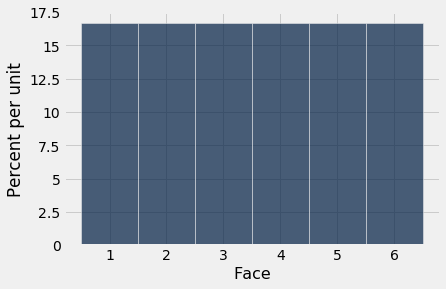

In [6]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

+ 6개 각각의 bin은 16.67% 확률로 선택될 수 있음을 표현


+ 위와 같은 이론적 분포와 달리 empirical distribution은 data에 기초
 - Table의 sample() method로 쉽게 구현


In [7]:
die.sample(10)

Face
1
1
3
3
2
2
6
1
4
1


+ 여러번 반복하여 histogram을 볼 수 있도록 함수로 정의해 보자.

In [0]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)

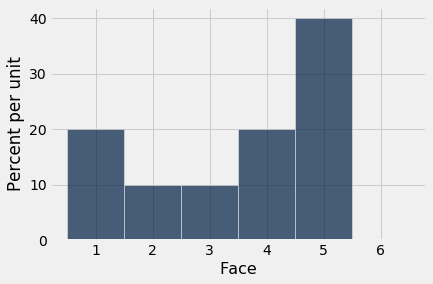

In [13]:
empirical_hist_die(10)


+ sample size를 증가시켜 보자.

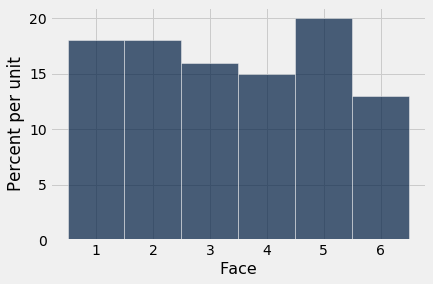

In [14]:
empirical_hist_die(100)

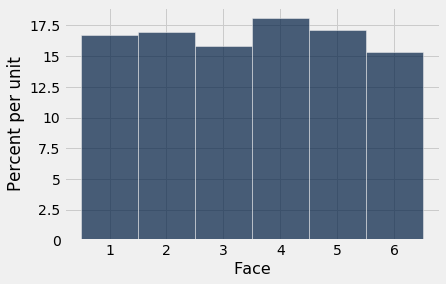

In [15]:
empirical_hist_die(1000)

+ sample size를 크게 할수록 이론적 distribution과 비슷해진다.

+ The law of Averages
 - sample 시행이 독립적이고 동일하게 반복된다면 ___(independently and under identical conditions)___ empirical distribution은 theoretical distribution에 근접해 간다.

> ### Sampling from a Population
---
+ 보다 큰 데이터를 가지고 distribution을 조사해 보자.


+ 비행 데이터
 - United Airlines 항공의 2015년 샌프란시스코 출발 국내선 자료

In [16]:
united = Table.read_table('united_summer2015.csv')
united

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [17]:
united.column('Delay').min()

-16

In [18]:
united.column('Delay').max()

580

In [19]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

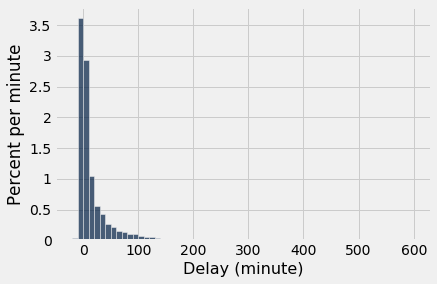

In [29]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.select('Delay').hist(bins = delay_bins, unit = 'minute')

+ visualization 편의를 위해 Delay가 200분이하인 경우만 시각화하자.

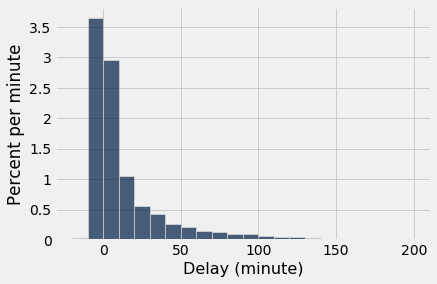

In [20]:
delay_bins = np.arange(-20, 201, 10)
united.select('Delay').hist(bins = delay_bins, unit = 'minute')

In [21]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

+ histogram 해석 리뷰
 - [0,10) bin의 비중이 약 30%였음을 의미한다.
 

+ Random sample with replacement 를 시행하자.
 - 반복 시행의 편의를 위해 함수로 만들자.

In [0]:
def empirical_hist_delay(n):
    united.sample(n).select('Delay').hist(bins = delay_bins, unit = 'minute')

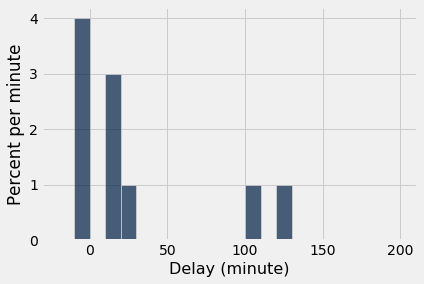

In [23]:
empirical_hist_delay(10)

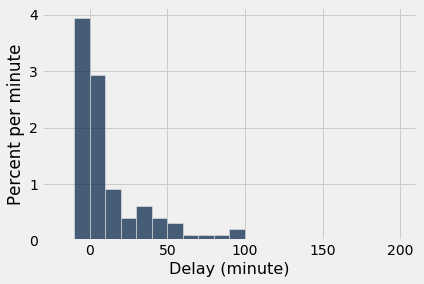

In [24]:
empirical_hist_delay(100)

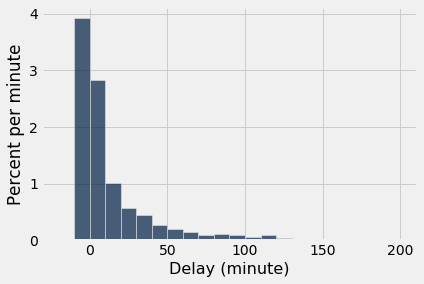

In [25]:
empirical_hist_delay(1000)


+ 역시 sample size를 증가시킬수록 empirical distribution이 모집단(population)의 distribution에 수렴해 간다.

> ### Empirical Distribution of a Statistic
---
+ 이제 통계값(치)(statistic parameter)에 대해서도 확장해 보자.


+ 용어
 - ___statistic parameters___ : population에 기초하여 구한 정량값
 - 예)
   * 유권자 중 후보 A에게 투표한 *비율*은?
   * 페이스북 사용자 중 친구 숫자의 *최대값*은?
   * 앞서 항공데이터에서 delay의 *중간값*은?
   

In [26]:
np.median(united.column('Delay'))


2.0

In [27]:
united.where('Delay', are.below_or_equal_to(2)).num_rows/united.num_rows


0.5018444846292948

In [28]:
united.where('Delay', are.equal_to(2)).num_rows


480

> Statistic
---
+ Data population 로부터 구한 정량값


+ median(중간값) 역시 statistic 이다.

In [31]:
sample_1000 = united.sample(1000)
np.median(sample_1000.column('Delay'))

2.0

+ 위 결과는 시행할 때마다 바뀔 수 있다.


+ 그렇다면 어떤 값이 나올 확률이 어떻게 다를까?
  - median의 분포를 구하면 된다.

In [0]:
medians = make_array()

for i in np.arange(1000):
    new_median = np.median(united.sample(1000).column('Delay'))
    medians = np.append(medians, new_median)


In [34]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
2
2
2
2
3
2
3
3
2
3


+ 이제 empirical histogram of the statistic 을 그려보자.

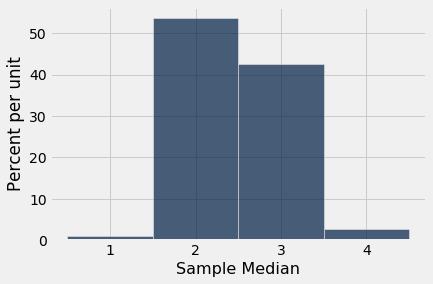

In [35]:
simulated_medians.hist(bins=np.arange(0.5, 5, 1))

+ 이 분포를 통해 50% 이상의 확률로 median이 2임을 알 수 있다.
 - 실제 pupulation의 median이 2였음을 상기하자.
 
 
+ The Power of Simulations
 - 충분히 큰 sample size를 정하고
 - 충분히 많이 반복한다면
 - Empirical statistic은 모집단의 그것에 수렴한다.

> ### Recap
---

+ A probability sample
 - sample이 chance에 의해 선택되는 것

+ Empirical distributions
 - Table의 sample() method
 - The law of averages

+ Empirical distribution of a statistic
 - 여러 통계량(statistic)도 그 분포를 조사하면 모집단의 그것을 추정할 수 있다.